<a href="https://colab.research.google.com/github/HughClaimsend/MA5851_HughMcMullan_A3/blob/main/MA5851_A3_Document_Number_3_Hugh_McMullan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MA5851 A3 Document Number 3 Hugh McMullan

##**Task 3-1 - TOPIC MODELLING NLP TASK**

##a. Brief Literature Review

In 2002 [**Blei and others**](https://www.frontiersin.org/articles/10.3389/frai.2020.00042/full) describe LDA as a three-level Bayesian model, with each item modelled as a mixture of terms from a set of topics, as probabilities that those terms exist in the topics. They highlight the applicability of the method for domains including document classification. They identified LDA as a ‘simple model’ useful in dimensionality reduction, also able to be scaled-up and used in conjunction with other more complex models.

[**Snyder**](https://files.eric.ed.gov/fulltext/ED571275.pdf) in 2015 discussed the [then] state of LDA modelling, noting the rapid rise in interest and applications of computational linguistics, highlighting deployments within the “… big companies – Google, Baidu, Amazon, Facebook …” [pp87]. He referenced the bag-of-words and pre-processing approaches used for LDA and other popular methods, including the application of Python.

[**Heck**](https://www.sciencedirect.com/science/article/pii/S1877050916300461) and others discuss approaches in speech applications when labelling data is unavailable. They describe an alternative Dirichlet Process Gaussian Mixture Model [‘DPGMM’], utilising ‘… LDA in an unsupervised fashion …’ [pp75] to improve that approach; LDA was superior to PCA in supporting that DPGMM model. They found that LDA estimation is ‘… particularly suitable …’[pp79]  supporting DPGMM clustering reliably using automatically-generated labels.

[**Palacio-Nino and Berzal**](https://arxiv.org/pdf/1905.05667.pdf) discuss techniques for evaluating the quality of clustering techniques in unsupervised machine learning. Amongst others, they identify cohesion and separation measures as internal validation methods that can be employed.

Support for the LDA techique comes from many sources. For instance [**Tong and Zhang**](https://www.researchgate.net/profile/Solomia-Fedushko/publication/331276764_Proceedings_of_the_Sixth_International_Conference_on_Computer_Science_Engineering_and_Information_Technology_CCSEIT_2016_Vienna_Austria_May_2122_2016/links/5c6fcd63299bf1268d1bc2b) in 2016 detail an application of LDA for analysing labelled tweets, describing the generated results as ‘… convincing …’[pp209]]; also [**Jacobi**](https://www.tandfonline.com/doi/abs/10.1080/21670811.2015.1093271) and others propose LDA as a ‘… cutting-edge technique …’ for analysing new content.

Lastly, supporting the adoption of the technique by a wide-ranging community, many instructive LDA tutorials are generous;y provided online: for instance [**Albalawi**](https://www.frontiersin.org/articles/10.3389/frai.2020.00042/full) and others, [**Kana**](https://towardsdatascience.com/topic-modeling-with-latent-dirichlet-allocation-by-example-3b22cd10c835) and [**Prabhakaran**](https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#12buildingthetopicmodel).

##b. Rationale for selection of the NLP task

The first objective of the assessment was to determine the topics of most interest (as they pertained to their interactions with CASA) to the commercial and private drone users, respectively.

A topic modelling exercise on the forums visisted and posted to by there drone users is an effective to achieve that.

Specifically, the *Latent Dirichlet Allocation* [*'LDA'*] model has been used, because of the support in the literature, and also because of the well-documented and multi-exampled materials available to support the use of that model.

Very specifically, the model applied is an unsupervised learning approach. Because posts were not labelled in any useful way for testing the model, no separation between traing and testing datasets has been applied here.

Other more complex approaches to validate the model's application might have been pursued [for example, re-gathering user identity codes, then aligning generated topic cluster with individual user ids, looking for correlation there - and then looking to see if a training/testing dataset comparison *persisted* those user-vs-topic alignment between the traing and testing datasets. This was considered to be a step too far for the prototype model development.

##c. Data pre-processing of inputs, separate from WebCrawler harvesting

From the texts extracted, for the topic modelling task, the processes adopted [and detailed alongside the code in section f below] are:

* remove unwanted characters [eg the posts contained explicit and visible line break characters '\n'; any character not in the a-z or 0-9 range would be removed]

* remove superfluous white space

* remove typical stopwords [as defined in the library stopwords resource

* tokenize words, for the *LDA* model application requirements

* **stem** words - initially this was not done, but appeared as necessary after the words 'fly' and 'flying' were both prominent in the model's 'Top words' output.

The code for these actions is shown below.

##d. Specification and justification of any hyperparameters

For the LDA model, as with clustering generally, the key assumption required is the *starting number of clusters*. 

The approach adopted was to derive *coherence scores' across a range of choices [1-20] for that starting number of clusters, and then use the value best-indicated by a graph of those coherence scores against numbers of clusters.

The graphs generated [for both commercial and private cases] were not particularly helpful, but broadly suppoorted the chosen value used [5].

Further, later analysis using the *pyLDAvis* portal comparing output clusters, generally supported that number of 5 [for both commercial and private]. Whereas in an earlier pass trying an assumend starting number of 9 clusters, several of the generated topics overlaid each other, discouraging the view that those were good/separate clusters identified.

While other parameter [eg the *perplexity* measure] could also have been cross-experimentally tried, for the prototype model development here that would have been difficult to accomplish in a reasonable timeframe.

##e. Preliminary assessment of NLP task performance

As discussed in c. above, it was felt to be impracticable to conduct training/testing dataset comparisons, to derive precision/recall/F1 metrics.

Coherence and perplexity scores are generated by the model, but there is little to use to assess the goodness or otherwise for this model's performance.



##f. Code

In [ ]:
dfPreppedText = dfDronePostsSince2018

**NLP pre-processing libraries were loaded**

In [ ]:
# Import libraries needed for this notebook
import re

import nltk
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from sklearn.feature_extraction.text import CountVectorizer

from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Constants were established for code readability

In [ ]:
# NLTK constants
PATTERN_S = re.compile("\'s")           # matches `'s` from text
PATTERN_R = re.compile("\r")            #matches `\r`
PATTERN_N = re.compile("\n")            #matches `\r` and `\n`
PATTERN_PUNC = re.compile(r"[^\w\s]")   # matches all non 0-9 A-z whitespace
STOPWORDS = set(stopwords.words('english'))

Functions were set up to:

(1) start with the *'target_text'* text field produced by the crawler/scraping process;

(2) remove unwanted characters; 

(3) convert text to lowercase;

(4) remove stopwords; and 

(5) store the resultant text in a new column *'cleaned_text'*

In [ ]:
# function for text cleaning 
def clean_text_using_nltk(text):
    text = text.lower()                     # Convert text to lowercase 

    text = re.sub(PATTERN_S, ' ', text)     # Remove apostrophe-s
    text = re.sub(PATTERN_R, ' ', text)     # Remove escaped \r characters
    text = re.sub(PATTERN_N, ' ', text)     # Remove escaped \n characters
    text = re.sub(PATTERN_PUNC, ' ', text)  # Remove non 0-9 A-z whitespace
    
    return text

# Apply the text cleaning function to the target_text
dfPreppedText['cleaned_text'] = dfPreppedText['target_text'].apply(lambda s: clean_text_using_nltk(s))

In [ ]:
# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in STOPWORDS]
    return ' '.join(no_stopword_text)

# Apply the stopwords removal function to the corpus text
dfPreppedText['cleaned_text'] = dfPreppedText['cleaned_text'].apply(lambda s: remove_stopwords(s))

A function was established to tokenise the cleaned_text and store the result in a new column *tokenized_text*

In [ ]:
# function to tokenize text
def apply_tokenizer(text):
    tokenizer = RegexpTokenizer('[a-zA-Z]\w+\'?\w*')    # use NLTK Regexp tokenizer
    return tokenizer.tokenize(text)

# Apply the stopwords removal function to the corpus text
dfPreppedText['tokenized_text'] = dfPreppedText['cleaned_text'].apply(lambda s: apply_tokenizer(s))

**Now also STEMMING the text as well**

When Topic Modelling [see Document 3] was carried, the key words included **both** 'fly' and 'flying'.  

That was unsatisfactory, so STEMMING was added, saving the new field as *stemmed_text*:

In [ ]:
# function to stem text
def apply_stemmer(text):
  stemmer=PorterStemmer()
  words = [stemmer.stem(word) for word in text]
  return words

# Apply the stemming function to the tokenized corpus text
dfPreppedText['stemmed_text'] = dfPreppedText['tokenized_text'].apply(lambda s: apply_stemmer(s))

Finally the pre-processed data was stored into .csv as well

In [ ]:
dfPreppedText.to_csv('/content/drive/MyDrive/DronePostsPreppedText_202112051330.csv')

Last, separate dataframes were selected [and saved] for **Commercial** and **Private** [drone users]:

In [ ]:
# Separate COMMERCIAL corpus from dfPreppedText
dfCommercial = dfPreppedText[dfPreppedText["dronesite_group"]=="Commercial"]
dfCommercial

,Unnamed: 0,dronesite_group,thread_name,post_YYMM,post_YYYY,post_text,target_text,cleaned_text,tokenized_text,stemmed_text
5052,5953,Commercial,What is the process of ReOC,2106,2021,Hi Guys. Im new here. I just enrolled the RePL...,What is the process of ReOC Hi Guys. Im new he...,process reoc hi guys im new enrolled repl reoc...,"[process, reoc, hi, guys, im, new, enrolled, r...","[process, reoc, hi, guy, im, new, enrol, repl,..."
5053,5954,Commercial,What is the process of ReOC,2106,2021,\n\nSteveChan said:\n\n\n\n\t\t\tHi Guys. Im n...,What is the process of ReOC \n\nSteveChan said...,process reoc stevechan said hi guys im new enr...,"[process, reoc, stevechan, said, hi, guys, im,...","[process, reoc, stevechan, said, hi, guy, im, ..."
5054,5955,Commercial,What is the process of ReOC,2106,2021,"Given that this is an international forum, the...",What is the process of ReOC Given that this is...,process reoc given international forum minimum...,"[process, reoc, given, international, forum, m...","[process, reoc, given, intern, forum, minimum,..."
5055,5956,Commercial,What is the process of ReOC,2106,2021,Mate there are documents that you can use on t...,What is the process of ReOC Mate there are doc...,process reoc mate documents use casa website c...,"[process, reoc, mate, documents, use, casa, we...","[process, reoc, mate, document, use, casa, web..."
5056,5957,Commercial,What is the process of ReOC,2106,2021,Hi Guys. Im new here. I just enrolled the RePL...,What is the process of ReOC Hi Guys. Im new he...,process reoc hi guys im new enrolled repl reoc...,"[process, reoc, hi, guys, im, new, enrolled, r...","[process, reoc, hi, guy, im, new, enrol, repl,..."
...,...,...,...,...,...,...,...,...,...,...
7663,12146,Commercial,Litchi wapoint missions,2007,2020,Would anyone be interested in flying gently cu...,Litchi wapoint missions Would anyone be intere...,litchi wapoint missions would anyone intereste...,"[litchi, wapoint, missions, would, anyone, int...","[litchi, wapoint, mission, would, anyon, inter..."
7664,12200,Commercial,Beseno Castle in 6K,1903,2019,\n\n\n\n\nCastel Beseno is an impressive fortr...,Beseno Castle in 6K \n\n\n\n\nCastel Beseno is...,beseno castle 6k castel beseno impressive fort...,"[beseno, castle, castel, beseno, impressive, f...","[beseno, castl, castel, beseno, impress, fortr..."
7665,12457,Commercial,Val Formazza Mountains and a stunning Waterfal...,1804,2018,\n\n\n\nAerial footage of one of Italy's hidde...,Val Formazza Mountains and a stunning Waterfal...,val formazza mountains stunning waterfall cine...,"[val, formazza, mountains, stunning, waterfall...","[val, formazza, mountain, stun, waterfal, cine..."
7666,12458,Commercial,Val Formazza Mountains and a stunning Waterfal...,1804,2018,"As always, your video is stunning. As good as ...",Val Formazza Mountains and a stunning Waterfal...,val formazza mountains stunning waterfall cine...,"[val, formazza, mountains, stunning, waterfall...","[val, formazza, mountain, stun, waterfal, cine..."


In [ ]:
dfCommercial.to_csv('/content/drive/MyDrive/DronePostsCommercial_202112051330.csv')

In [ ]:
# Separate PRIVATE corpus from dfPreppedText
dfPrivate = dfPreppedText[dfPreppedText["dronesite_group"]=="Private"]
dfPrivate

,Unnamed: 0,dronesite_group,thread_name,post_YYMM,post_YYYY,post_text,target_text,cleaned_text,tokenized_text,stemmed_text
0,0,Private,Latest CASA newsletter re VLOS,2110,2021,..\nLatest CASA newsletter has VLOS article wh...,Latest CASA newsletter re VLOS ..\nLatest CASA...,latest casa newsletter vlos latest casa newsle...,"[latest, casa, newsletter, vlos, latest, casa,...","[latest, casa, newslett, vlo, latest, casa, ne..."
1,1,Private,Latest CASA newsletter re VLOS,2110,2021,I'm guessing they're making a distinction betw...,Latest CASA newsletter re VLOS I'm guessing th...,latest casa newsletter vlos guessing making di...,"[latest, casa, newsletter, vlos, guessing, mak...","[latest, casa, newslett, vlo, guess, make, dis..."
2,2,Private,Latest CASA newsletter re VLOS,2110,2021,"If it’s like the US, the expectation is to use...",Latest CASA newsletter re VLOS If it’s like th...,latest casa newsletter vlos like us expectatio...,"[latest, casa, newsletter, vlos, like, us, exp...","[latest, casa, newslett, vlo, like, us, expect..."
3,3,Private,Latest CASA newsletter re VLOS,2110,2021,CASA is not trying to tell us to keep our eyes...,Latest CASA newsletter re VLOS CASA is not try...,latest casa newsletter vlos casa trying tell u...,"[latest, casa, newsletter, vlos, casa, trying,...","[latest, casa, newslett, vlo, casa, tri, tell,..."
4,4,Private,Latest CASA newsletter re VLOS,2110,2021,\n\nthispilothere said:\n\n\n\nI'm guessing th...,Latest CASA newsletter re VLOS \n\nthispilothe...,latest casa newsletter vlos thispilothere said...,"[latest, casa, newsletter, vlos, thispilothere...","[latest, casa, newslett, vlo, thispilother, sa..."
...,...,...,...,...,...,...,...,...,...,...
5047,5926,Private,[Question] CASA permit for FPV drones in Austr...,2103,2021,Yeah nah you need to have a REPL licence etc a...,[Question] CASA permit for FPV drones in Austr...,question casa permit fpv drones australia yeah...,"[question, casa, permit, fpv, drones, australi...","[question, casa, permit, fpv, drone, australia..."
5048,5927,Private,[Question] CASA permit for FPV drones in Austr...,2103,2021,Actually I just double checked. Anyone can app...,[Question] CASA permit for FPV drones in Austr...,question casa permit fpv drones australia actu...,"[question, casa, permit, fpv, drones, australi...","[question, casa, permit, fpv, drone, australia..."
5049,5939,Private,[Question] CASA permit for FPV drones in Austr...,2103,2021,I understand that to fly FPV in Australia you ...,[Question] CASA permit for FPV drones in Austr...,question casa permit fpv drones australia unde...,"[question, casa, permit, fpv, drones, australi...","[question, casa, permit, fpv, drone, australia..."
5050,5940,Private,[Question] CASA permit for FPV drones in Austr...,2103,2021,Yeah nah you need to have a REPL licence etc a...,[Question] CASA permit for FPV drones in Austr...,question casa permit fpv drones australia yeah...,"[question, casa, permit, fpv, drones, australi...","[question, casa, permit, fpv, drone, australia..."


In [ ]:
dfPrivate.to_csv('/content/drive/MyDrive/DronePostsPrivate_202112051330.csv')

**Exploratory Data Analysis on data ready for NLP**

Just as simple pre-test before commencing the NLP, WordClouds were generated for the Commercial and Private datasets, showing the 'Top 20' words in each

{'casa': 2818, 'reoc': 2465, 'repl': 2256, 'drone': 1921, 'fli': 1855, 'good': 1403, 'get': 1106, 'use': 1089, 'said': 1081, 'pilot': 1052, 'expand': 1049, 'click': 1048, 'insur': 985, 'would': 960, 'time': 831, 'forum': 762, 'commerci': 746, 'australian': 719, 'like': 686, 'year': 667}


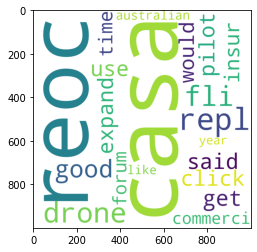

In [ ]:
# Top 20 Words in Commercial posts
comm_top20_tuples = most_frequent_words([word for post in dfCommercial.stemmed_text for word in post], 20)
comm_top20_dictionary = convert_tuples_to_dictionary(comm_top20_tuples)
print(comm_top20_dictionary)

# WordCloud for Top 20 Words in Commercial posts
comm_top20_wordcloud = WordCloud(background_color="white", width=1000, height=1000, max_words=20, relative_scaling=0.5, normalize_plurals=False).generate_from_frequencies(comm_top20_dictionary)
plt.imshow(comm_top20_wordcloud)

{'fli': 6922, 'drone': 6589, 'said': 2831, 'casa': 2523, 'click': 2415, 'expand': 2389, 'rule': 2357, 'would': 2182, 'use': 1864, 'get': 1790, 'peopl': 1776, 'like': 1764, 'time': 1554, 'flight': 1499, 'know': 1429, 'see': 1411, 'one': 1313, 'go': 1276, 'take': 1178, 'pilot': 1165}


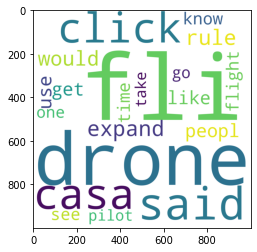

In [ ]:
# Top 20 Words in Commercial posts
priv_top20_tuples = most_frequent_words([word for post in dfPrivate.stemmed_text for word in post], 20)
priv_top20_dictionary = convert_tuples_to_dictionary(priv_top20_tuples)
print(priv_top20_dictionary)

# WordCloud for Top 20 Words in Commercial posts
priv_top20_wordcloud = WordCloud(background_color="white", width=1000, height=1000, max_words=20, relative_scaling=0.5, normalize_plurals=False).generate_from_frequencies(priv_top20_dictionary)
plt.imshow(priv_top20_wordcloud)

These simple WordClouds are not significant - but still interesting.

**Commercial** users require **Remote Operator Certificate** (known as the **'ReOc'**). This ReOc is extremely difficult and expensive to obtain, onerous to report on and comply with, it allows businesses to provide commercial drone services - and it is the bane of commercial operators' existences. So to see that in the WordCloud for these operators is encouraging.

In [ ]:
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel

**TOPIC MODELLING FOR COMMERCIAL POSTS**

In [ ]:
# Build a dictionary where for each COMMERCIAL post, each word has its own id
comm_dictionary = Dictionary(dfCommercial.stemmed_text)

# Print the numbers of words and posts
comm_posts = len(dfCommercial)
comm_words = len(comm_dictionary)
print("COMMERCIAL:", comm_posts, "posts; ", comm_words, "words")

# build the corpus i.e. vectors with the number of occurence of each word per post
comm_corpus = [comm_dictionary.doc2bow(post) for post in dfCommercial.stemmed_text]

COMMERCIAL: 2615 posts;  3464 words


[**LDA Model development approach as described by *Michel Kana***](https://towardsdatascience.com/topic-modeling-with-latent-dirichlet-allocation-by-example-3b22cd10c835)

The code here is adapted from a model presented by Michel Kana in a *'towards data science'* 2020 tutorial [[**Michel Kana**]](https://towardsdatascience.com/topic-modeling-with-latent-dirichlet-allocation-by-example-3b22cd10c835).

According to Kana, *'... Topic Coherence is usually preferred to Perplexity techniques'*, and the *'... the number of topics for which the average score plateaus, is the sweet spot we are looking for ...'* [for the selection of an assumed number of topics to base the model training on. 

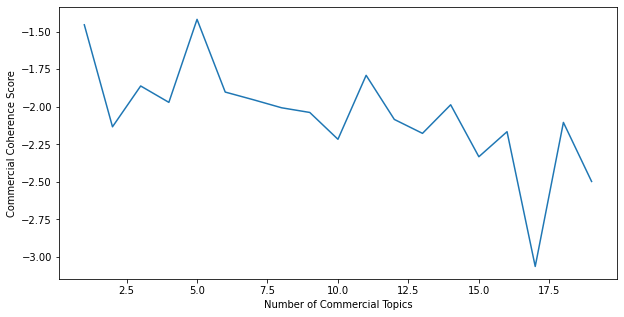

In [ ]:
# Compute coherence scores for a big number of tested topic numbers
comm_coherence = []
for nb_topics in range(1,20):
    comm_lda = LdaModel(comm_corpus, num_topics = nb_topics, id2word = comm_dictionary, passes=10)
    comm_cohm = CoherenceModel(model=comm_lda, corpus=comm_corpus, dictionary=comm_dictionary, coherence='u_mass')
    comm_coh = comm_cohm.get_coherence()
    comm_coherence.append(comm_coh)

# visualize coherence
plt.figure(figsize=(10,5))
plt.plot(range(1,20),comm_coherence)
plt.xlabel("Number of Commercial Topics Tested")
plt.ylabel("Commercial Coherence Score");

In [ ]:
# Generate Top 5 topics summaries for COMMERCIAL posts
posts_group = "Commercial"
comm_no_of_topics = 5
top_n_words = 20
comm_lda = LdaModel(comm_corpus, num_topics = comm_no_of_topics, id2word = comm_dictionary, passes=10)

# Generate lists of words and frequencies
comm_top_words = [[word for word,_ in comm_lda.show_topic(topic_id, topn=50)] for topic_id in range(comm_lda.num_topics)]
comm_top_betas = [[beta for _,beta in comm_lda.show_topic(topic_id, topn=50)] for topic_id in range(comm_lda.num_topics)]

In [ ]:
def plot_top_words(top_words, top_betas, nb_topics, nb_words, posts_group):
    gs  = gridspec.GridSpec(round(math.sqrt(nb_topics))+1,round(math.sqrt(nb_topics))+1)
    gs.update(wspace=0.5, hspace=0.5)
    plt.figure(figsize=(20, 15))
    for i in range(nb_topics):
      topic = i + 1
      ax = plt.subplot(gs[i])
      plt.barh(range(nb_words), top_betas[i][:nb_words], align='center',color='blue', ecolor='black')
      ax.invert_yaxis()
      ax.set_yticks(range(nb_words))
      ax.set_yticklabels(top_words[i][:nb_words])
      plt.title(posts_group + " Topic " + str(topic))

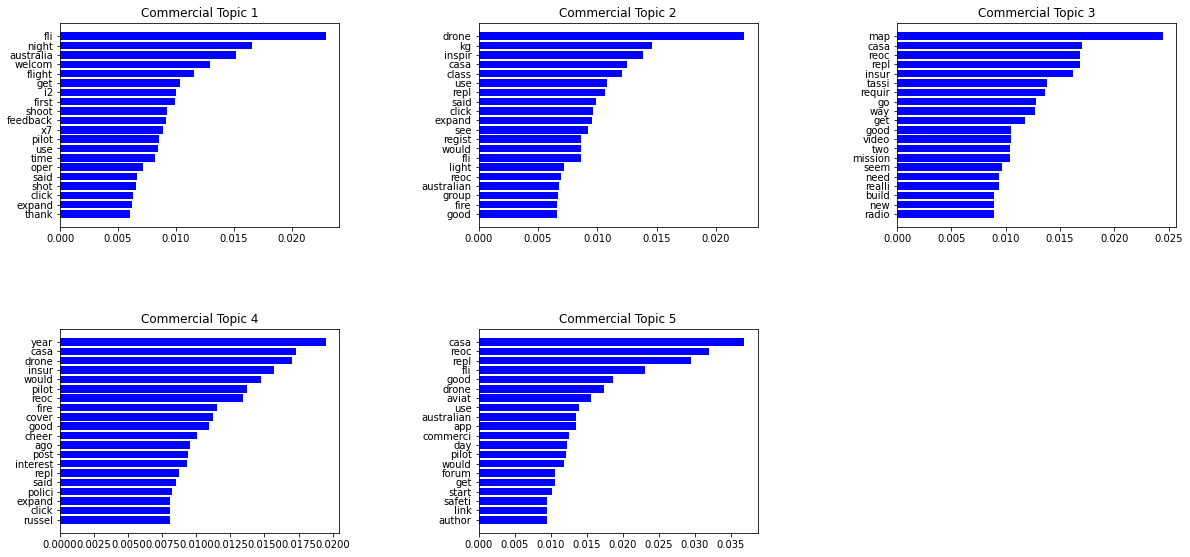

In [ ]:
plot_top_words(comm_top_words, comm_top_betas, comm_no_of_topics, top_n_words, posts_group)

In [ ]:
def wordcloud_top_words(top_words, top_betas, nb_topics, nb_words, posts_group):
    gs  = gridspec.GridSpec(round(math.sqrt(nb_topics))+1,round(math.sqrt(nb_topics))+1)
    gs.update(wspace=0.5, hspace=0.5)
    plt.figure(figsize=(20,15))
    for i in range(nb_topics):
      words = top_words[i]
      betas = top_betas[i]
      zip_iterator = zip(words, betas)
      top_words_dict = dict(zip_iterator)
      wc = WordCloud(background_color="white", width=1600, height=1000, max_words=nb_words, 
                     relative_scaling=0.5, normalize_plurals=False).generate_from_frequencies(top_words_dict)

      topic = i + 1
      ax = plt.subplot(gs[i])
      ax.set_title(posts_group + " Topic " + str(topic))
      ax.axis('off')
      plt.imshow(wc)

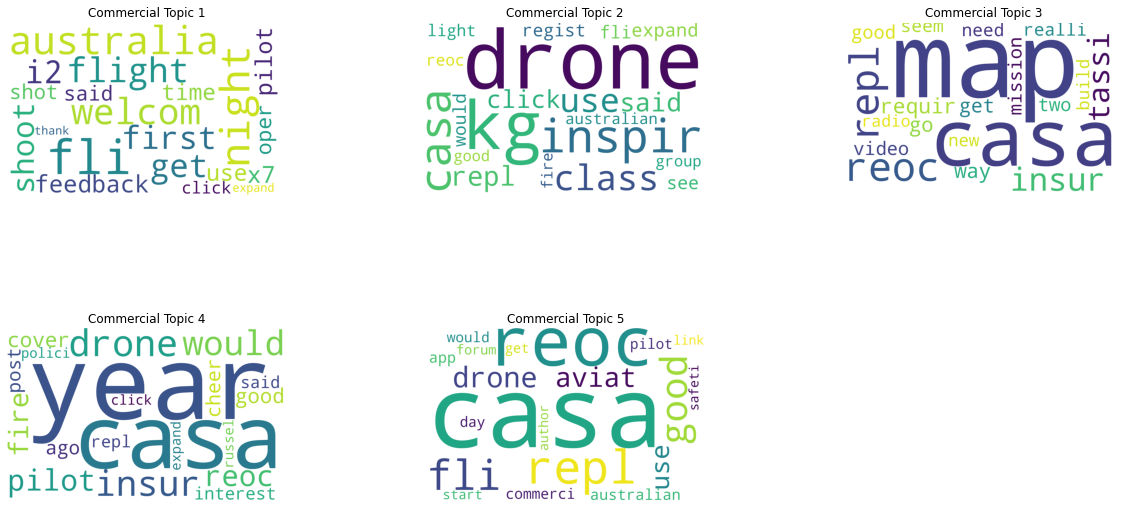

In [ ]:
wordcloud_top_words(comm_top_words, comm_top_betas, comm_no_of_topics, top_n_words, posts_group)

**TOPIC MODELLING FOR PRIVATE POSTS**

In [ ]:
# Build a dictionary where for each PRIVATE post, each word has its own id
priv_dictionary = Dictionary(dfPrivate.stemmed_text)

# Print the numbers of words and posts
priv_posts = len(dfPrivate)
priv_words = len(priv_dictionary)
print("PRIVATE:", priv_posts, "posts; ", priv_words, "words")

# build the corpus i.e. vectors with the number of occurence of each word per post
priv_corpus = [priv_dictionary.doc2bow(post) for post in dfPrivate.stemmed_text]

PRIVATE: 5052 posts;  6814 words


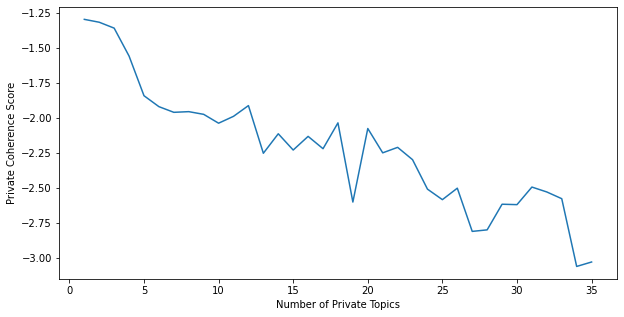

In [ ]:
# Compute coherence scores for a big number of tested topic numbers
priv_coherence = []
for nb_topics in range(1,20):
    priv_lda = LdaModel(priv_corpus, num_topics = nb_topics, id2word = priv_dictionary, passes=10)
    priv_cohm = CoherenceModel(model=priv_lda, corpus=priv_corpus, dictionary=priv_dictionary, coherence='u_mass')
    priv_coh = priv_cohm.get_coherence()
    priv_coherence.append(priv_coh)

# visualize coherence
plt.figure(figsize=(10,5))
plt.plot(range(1,20),priv_coherence)
plt.xlabel("Number of Private Topics")
plt.ylabel("Private Coherence Score");

In [ ]:
# Generate Top 5 topics summaries for PRIVATE posts
posts_group = "PRIVATE"
priv_no_of_topics = 5
top_n_words = 20
priv_lda = LdaModel(priv_corpus, num_topics = priv_no_of_topics, id2word = priv_dictionary, passes=10)

# Generate lists of words and frequencies
priv_top_words = [[word for word,_ in priv_lda.show_topic(topic_id, topn=50)] for topic_id in range(priv_lda.num_topics)]
priv_top_betas = [[beta for _,beta in priv_lda.show_topic(topic_id, topn=50)] for topic_id in range(priv_lda.num_topics)]

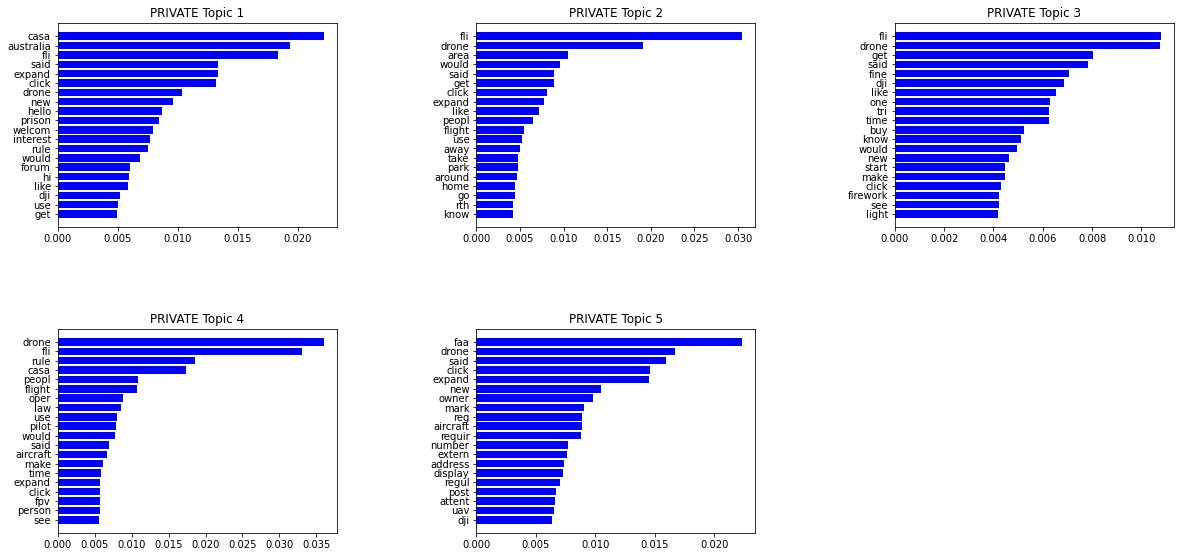

In [ ]:
plot_top_words(priv_top_words, priv_top_betas, priv_no_of_topics, top_n_words, posts_group)

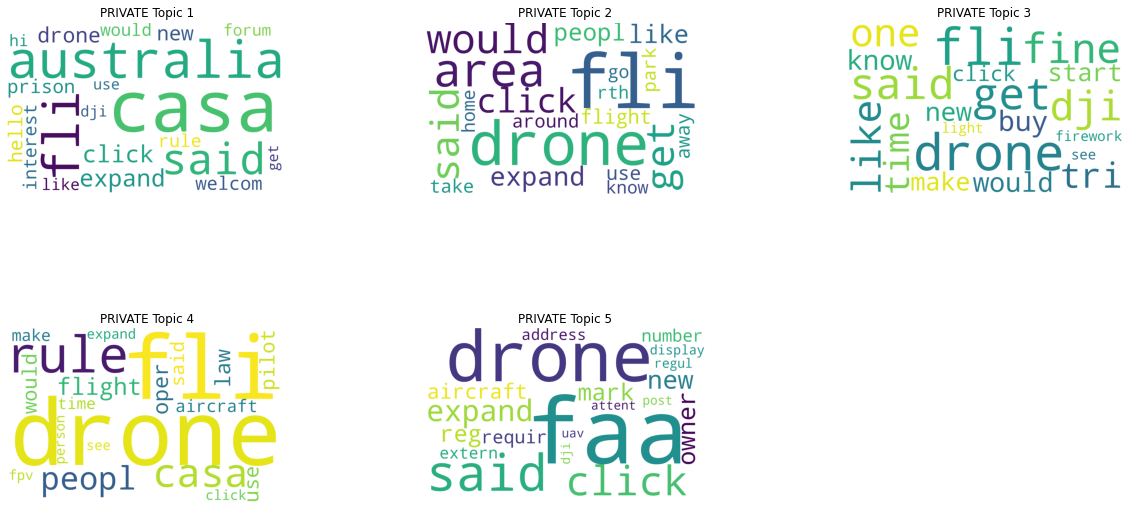

In [ ]:
wordcloud_top_words(priv_top_words, priv_top_betas, priv_no_of_topics, top_n_words, posts_group)

**Implement pyLDAvis workbooks**

In [ ]:
# feed the LDA model into the pyLDAvis instance
comm_lda_viz = gensimvis.prepare(comm_lda, comm_corpus, comm_dictionary)
pyLDAvis.display(comm_lda_viz)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [ ]:
# feed the PRIVATE LDA model into the pyLDAvis instance
priv_lda_viz = gensimvis.prepare(priv_lda, priv_corpus, priv_dictionary)
pyLDAvis.display(priv_lda_viz)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


##**Task 3-2 - SENTIMENT MODELLING NLP TASK**

##a. Brief Literature Review

**[Hutto and Gilbert](http://comp.social.gatech.edu/papers/icwsm14.vader.hutto.pdf)** introduce their *VADER* [‘Valence Aware Dictionary for 
sEntiment Reasoning’ ]rule-based model for general sentiment analysis, on blog-like applications (particularly *twitter*). They find that their model compares fvourably to a wide range of alternative ML approaches. Alongside their model they devop and use a *’gold-standard lexicon’* ‘… especially attuned to micro-blog-type contexts’ [pp216]. Amongst other things, their paper sets illustrates a strong framework ‘… methods and process approach overview’ for such applications. [pp219]

**[Sarlis and Maglogiannis](https://link.springer.com/chapter/10.1007/978-3-030-49161-1_34)** evaluate a wide range of ML algorithms for labelled sentiment analysis applications, using the IMDb dataset and twitter datasets for test cases. On the IMDb data, neural network-based approaches provide the best results; on the twitter data, moderate results only are achieved.

**[Elbagir and Yang](http://www.iaeng.org/publication/IMECS2019/IMECS2019_pp12-16.pdf)** extend previous applications of *VADER* alongside *NLTK* in a multi-classification system for analysing tweets. They referred to previous studies (e.g. **[Wagh, 2018](https://www.researchgate.net/publication/326054514_A_Twitter_Sentiment_Analysis_Using_NLTK_and_Machine_Learning_Techniques)** where training sentiment analysis models with data from one domain had not generated good results when applied to other domains. Their multi-classification model generated effective results.

As with the *LDA* community support mentioned above, there are many community-contributed learning resources for the *VADER*-based sentiment analysis modelling e.g.[**Parul Pandey**, *Analytics Vidhya*](https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f).


##b. Rationale for selection of the NLP task

The second objective of the assessment exercise here was to form a view on how well CASA relates to the commercial and private drone users subject to its regulation. 

To that extent, sentiment analysis is a useful tool, especially when viewed over time.

The *VADER* library and associated resources was chosed [like the LDA choice for the topic modelling] for its wide community acceptance and respect, and also for the extensive community support with papers and tutorials to assist an inexperienced and inexpert user [me].

##c. Data pre-processing of inputs, separate from WebCrawler harvesting

**The *VADER* library, and the *sentiment analysis* task itself, required different pre-processing from that used for the topic modelling task.**

Specifically:

(1) the NLP task needed to be applied to **sentences**, not just word tokens;

(2) and punctuation could impact sentiment, so leave that puctuation in place;

(3) the *VADER* library removes stopwords itself, so that did not need to be done explicitly here;

(4) capitals matter for sentiment analyses, so lowercasing text is not appropriate;

(5) so in the end, the only required action was to remove the "\n" characters.

A function was set up to re-apply just that to the original 'target_text' extracted by the crawler/scraper process, and store the result in a separate 'vader_ready_text' column.  This was applied directly to the *dfCommercial* and *dfPrivate* dataframes.

In [ ]:
# function for text cleaning 
def vader_clean_text_using_nltk(text):
    text = re.sub(PATTERN_N, ' ', text)     # Remove escaped \n characters
    return text

# Apply the text cleaning function to the target_text in dfCommercial and dfPrivate
dfCommercial['vader_ready_text'] = dfCommercial['target_text'].apply(lambda s: vader_clean_text_using_nltk(s))
dfPrivate['vader_ready_text'] = dfPrivate['target_text'].apply(lambda s: vader_clean_text_using_nltk(s))


##d. Specification and justification of any hyperparameters

No hyperparameters are required for the VADER sentimet analysis modelling.

##e. Preliminary assessment of NLP task performance

As described in the literature mentioned above, evaluating performance is not straightforward for the unsupervised clustering task used here.

As with the LDA task above, one could attempt a complex exercise, cross-relating other domains (e.g.users identified against posts, matched in a training set against derived sentiment analyses) - then testing the sentiment analysis model by comparing new sentiment scores for the same users - but in a different time period (say), as a testing dataset. This would be extremely complex to effect, beyond the scope of a prototype system development, and might not establish validity in any event.

##f. Code

In [ ]:
import pandas as pd
import numpy as np
import re

from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

# Install the VADER sentiment analysis library
!pip install vaderSentiment
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

In [ ]:
# The data files are located on the Google Drive, so do a drive.mount
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Read in the COMMERCIAL and PRIVATE posts data, created in the Part 2 notebook
dfCommercial = pd.read_csv('/content/drive/MyDrive/DronePostsCommercial_202112051330.csv')
dfPrivate = pd.read_csv('/content/drive/MyDrive/DronePostsPrivate_202112051330.csv')

**Different pre-processing for VADER library requirements**

(1) using sentences, not tokens;

(2) so leave punctuation in place;

(3) VADER removes stopwords itself, so do not need to do that explicitly;

(4) don't lowercase text, because capitals matter for sentiment analyses;

(5) just remove "\n" characters.

In [ ]:
# NLTK constants
PATTERN_N = re.compile("\n")            #matches `\r` and `\n`

In [ ]:
# function for text cleaning 
def vader_clean_text_using_nltk(text):
    text = re.sub(PATTERN_N, ' ', text)     # Remove escaped \n characters
    return text

# Apply the text cleaning function to the target_text in dfCommercial and dfPrivate
dfCommercial['vader_ready_text'] = dfCommercial['target_text'].apply(lambda s: vader_clean_text_using_nltk(s))
dfPrivate['vader_ready_text'] = dfPrivate['target_text'].apply(lambda s: vader_clean_text_using_nltk(s))

**Apply VADER functionality to add Sentiment score to eeach row in dfCommercial and dfPrivate**

The process deploys the *VADER* library *SentimentIntensityAnalyzer* object, containing the methods to generate polarity scores on blocks of words [as sentences in this case].

In [ ]:
# Instantiate the VADER SentimentIntensityAnalyzer
vsia = SentimentIntensityAnalyzer()

Tests of the SentimentIntensityAnalyzer are applied here to ensure my understanding of the library function's treatment of text is correct.

In [ ]:
# function to score a sentence
def sentiment_analyzer_sentence_score(sentence):
    score = vsia.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

text = "THe Swans are the best team ever"
sentiment_analyzer_sentence_score(text) 

text = "The Swans are the best team ever!"
sentiment_analyzer_sentence_score(text)

text = "The Swans are the BEST team ever!"
sentiment_analyzer_sentence_score(text)

text = "The Swans, they are the BEST team ever!"
sentiment_analyzer_sentence_score(text)

text = "The Swans, they are absolutely the BEST team ever!"
sentiment_analyzer_sentence_score(text)

text = "The Swans, they are hardly the BEST team ever!"
sentiment_analyzer_sentence_score(text)

text = "wtf, The Swans, they are hardly the BEST team ever!"
sentiment_analyzer_sentence_score(text)

text = "wtf, those Swans. They are hardly the BEST team ever!"
sentiment_analyzer_sentence_score(text)

THe Swans are the best team ever-------- {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.6369}
The Swans are the best team ever!------- {'neg': 0.0, 'neu': 0.572, 'pos': 0.428, 'compound': 0.6696}
The Swans are the BEST team ever!------- {'neg': 0.0, 'neu': 0.535, 'pos': 0.465, 'compound': 0.7371}
The Swans, they are the BEST team ever!- {'neg': 0.0, 'neu': 0.573, 'pos': 0.427, 'compound': 0.7371}
The Swans, they are absolutely the BEST team ever! {'neg': 0.0, 'neu': 0.592, 'pos': 0.408, 'compound': 0.7582}
The Swans, they are hardly the BEST team ever! {'neg': 0.0, 'neu': 0.618, 'pos': 0.382, 'compound': 0.7137}
wtf, The Swans, they are hardly the BEST team ever! {'neg': 0.227, 'neu': 0.478, 'pos': 0.295, 'compound': 0.2839}
wtf, those Swans. They are hardly the BEST team ever! {'neg': 0.227, 'neu': 0.478, 'pos': 0.295, 'compound': 0.2839}


Each post can contain multiple sentences.

The approach chosen here is to:

(1) extract each separate sentence from each post;

(2) obtain a polarity score for each separate sentence; 

(3) for each post, take the **average sentence polarity score across senetences within each post**.

A function to split posts into sentences:

In [ ]:
def split_text_into_sentences(texts):
  sentences = nltk.sent_tokenize(texts)
  return sentences

# text = "Wtf, those Swans. They are definitely the BEST team ever! Just ask them."
# sentences = split_text_into_sentences(text)
# sentences

A function to generate the averaged-over-sentences-within-posts score for each post:

In [ ]:
# function for scoring multiple sentences in a single post
def sentiment_analyzer_multiple_sentences_in_post_score(post):
  sentences = split_text_into_sentences(post)
  scores = []
  for sentence in sentences:
    score = vsia.polarity_scores(sentence)
    scores.append(score['compound'])
    # print(sentence, str(score))
  average_score = sum(scores) / (len(scores) + 0.0001)
  return average_score

# text = "Those Swans. They are definitely the BEST team ever! Just ask them."
# sentiment_analyzer_multiple_sentences_in_post_score(text)

Apply the scoring function to each row in the dataframes, generating a new column '*sentiment_score*':

In [ ]:
dfCommercial['sentiment_score'] = dfCommercial['vader_ready_text'].apply(lambda s: sentiment_analyzer_multiple_sentences_in_post_score(s))
dfPrivate['sentiment_score'] = dfPrivate['vader_ready_text'].apply(lambda s: sentiment_analyzer_multiple_sentences_in_post_score(s))
# dfCommercial

And add an additional column '*sentiment_polarity*', showing as 'Positive' or 'Negative' or 'Neutral', based on the sentiment_score value:

In [ ]:
# function for assigning sentiment polarity based on compound score
def sentiment_analyzer_polarity_from_score(score):
  polarity = "Neutral"
  if score > 0:
    polarity = "Positive"
  if score < 0:
    polarity = "Negative"
  return polarity

# text = "Those Swans. They are not the BEST team ever! Just ask them."
# score = sentiment_analyzer_multiple_sentences_in_post_score(text)
# polarity = sentiment_analyzer_polarity_from_score(score)
# print(score, polarity)

In [ ]:
dfCommercial['sentiment_polarity'] = dfCommercial['sentiment_score'].apply(lambda f: sentiment_analyzer_polarity_from_score(f))
dfPrivate['sentiment_polarity'] = dfPrivate['sentiment_score'].apply(lambda f: sentiment_analyzer_polarity_from_score(f))
dfCommercial

,Unnamed: 0,Unnamed: 0.1,dronesite_group,thread_name,post_YYMM,post_YYYY,post_text,target_text,cleaned_text,tokenized_text,stemmed_text,vader_ready_text,sentiment_score,sentiment_polarity
0,5052,5953,Commercial,What is the process of ReOC,2106,2021,Hi Guys. Im new here. I just enrolled the RePL...,What is the process of ReOC Hi Guys. Im new he...,process reoc hi guys im new enrolled repl reoc...,"['process', 'reoc', 'hi', 'guys', 'im', 'new',...","['process', 'reoc', 'hi', 'guy', 'im', 'new', ...",What is the process of ReOC Hi Guys. Im new he...,0.073021,Positive
1,5053,5954,Commercial,What is the process of ReOC,2106,2021,\n\nSteveChan said:\n\n\n\n\t\t\tHi Guys. Im n...,What is the process of ReOC \n\nSteveChan said...,process reoc stevechan said hi guys im new enr...,"['process', 'reoc', 'stevechan', 'said', 'hi',...","['process', 'reoc', 'stevechan', 'said', 'hi',...",What is the process of ReOC SteveChan said: ...,0.104442,Positive
2,5054,5955,Commercial,What is the process of ReOC,2106,2021,"Given that this is an international forum, the...",What is the process of ReOC Given that this is...,process reoc given international forum minimum...,"['process', 'reoc', 'given', 'international', ...","['process', 'reoc', 'given', 'intern', 'forum'...",What is the process of ReOC Given that this is...,0.017199,Positive
3,5055,5956,Commercial,What is the process of ReOC,2106,2021,Mate there are documents that you can use on t...,What is the process of ReOC Mate there are doc...,process reoc mate documents use casa website c...,"['process', 'reoc', 'mate', 'documents', 'use'...","['process', 'reoc', 'mate', 'document', 'use',...",What is the process of ReOC Mate there are doc...,-0.074898,Negative
4,5056,5957,Commercial,What is the process of ReOC,2106,2021,Hi Guys. Im new here. I just enrolled the RePL...,What is the process of ReOC Hi Guys. Im new he...,process reoc hi guys im new enrolled repl reoc...,"['process', 'reoc', 'hi', 'guys', 'im', 'new',...","['process', 'reoc', 'hi', 'guy', 'im', 'new', ...",What is the process of ReOC Hi Guys. Im new he...,0.073021,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2610,7663,12146,Commercial,Litchi wapoint missions,2007,2020,Would anyone be interested in flying gently cu...,Litchi wapoint missions Would anyone be intere...,litchi wapoint missions would anyone intereste...,"['litchi', 'wapoint', 'missions', 'would', 'an...","['litchi', 'wapoint', 'mission', 'would', 'any...",Litchi wapoint missions Would anyone be intere...,0.389131,Positive
2611,7664,12200,Commercial,Beseno Castle in 6K,1903,2019,\n\n\n\n\nCastel Beseno is an impressive fortr...,Beseno Castle in 6K \n\n\n\n\nCastel Beseno is...,beseno castle 6k castel beseno impressive fort...,"['beseno', 'castle', 'castel', 'beseno', 'impr...","['beseno', 'castl', 'castel', 'beseno', 'impre...",Beseno Castle in 6K Castel Beseno is an i...,0.133392,Positive
2612,7665,12457,Commercial,Val Formazza Mountains and a stunning Waterfal...,1804,2018,\n\n\n\nAerial footage of one of Italy's hidde...,Val Formazza Mountains and a stunning Waterfal...,val formazza mountains stunning waterfall cine...,"['val', 'formazza', 'mountains', 'stunning', '...","['val', 'formazza', 'mountain', 'stun', 'water...",Val Formazza Mountains and a stunning Waterfal...,0.261567,Positive
2613,7666,12458,Commercial,Val Formazza Mountains and a stunning Waterfal...,1804,2018,"As always, your video is stunning. As good as ...",Val Formazza Mountains and a stunning Waterfal...,val formazza mountains stunning waterfall cine...,"['val', 'formazza', 'mountains', 'stunning', '...","['val', 'formazza', 'mountain', 'stun', 'water...",Val Formazza Mountains and a stunning Waterfal...,0.662445,Positive


# **Review the generated sentiment by month**

Count numbers of 'Positive' or 'Negative' or 'Neutral' by month, for each of the commercial and private drone users datasets:

**DATA ISSUE**
From the initial EDA after the dfCommercial dataframe had been established, it became clear that a large pile of all-Positive posts had been loaded into the commercial-oriented web sites [likely just a migration from another discontinued site].

Even though dropping those reduces the numbers of posts for reporting, the patterns for later periods are still useful.

Accordingly, the '1801' month (for the commercial group) has been excluded **just for this reporting here**.

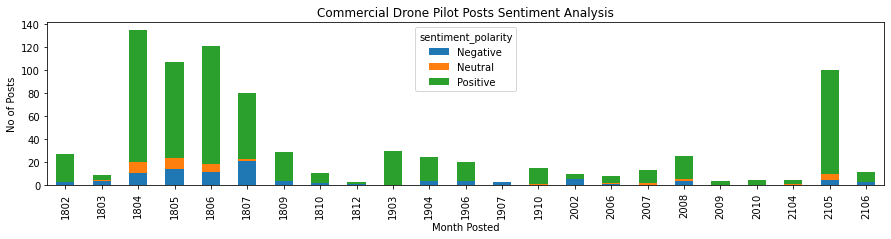

In [ ]:
dfCommExcl1801 = dfCommercial[dfCommercial["post_YYMM"]>1801]
dfSIComm = dfCommExcl1801.groupby('post_YYMM')['sentiment_polarity'].value_counts().unstack(level=1)
dfSIComm.plot.bar(stacked=True, title='Commercial Drone Pilot Posts Sentiment Analysis', ylabel='No of Posts',
         xlabel='Month Posted', figsize=(15, 3))

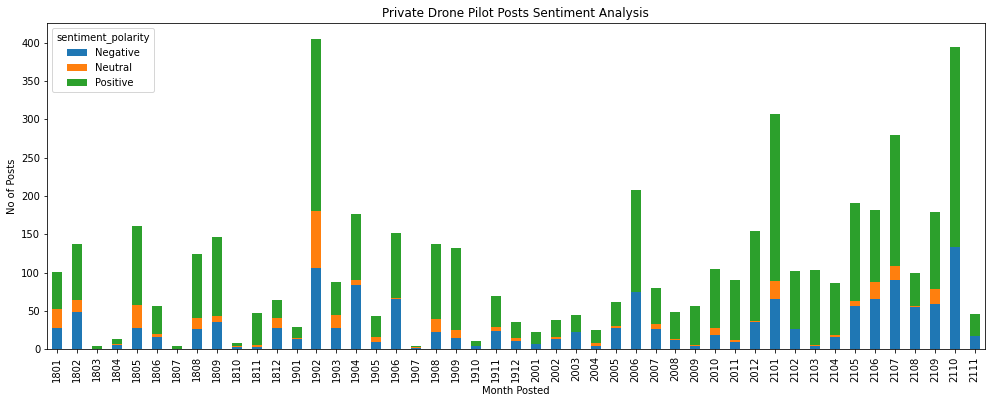

In [ ]:
dfSIPriv = dfPrivate.groupby('post_YYMM')['sentiment_polarity'].value_counts().unstack(level=1)
dfSIPriv.plot.bar(stacked=True, title='Private Drone Pilot Posts Sentiment Analysis', ylabel='No of Posts',
         xlabel='Month Posted', figsize=(16.8, 6))

##References

Albalawi, R. a. (2020). Using Topic Modeling Methods for Short-Text Data: A Comparative Analysis. Frontiers in Artificial Intelligence. Retrieved from https://www.frontiersin.org/articles/10.3389/frai.2020.00042/full

David Blei, A. N. (2002). Latent Dirichlet Allocation. Journal of Machine Learning Research. Retrieved from https://www.jmlr.org/papers/volume3/blei03a/blei03a.pdf

González-Castaño, M. F.-G.-L.-M.-M. (2016). Unsupervised method for sentiment analysis in online texts. Expert Systems with Applications. doi:https://doi.org/10.1016/j.eswa.2016.03.031

Hutto, C. a. (2014). VADER: A Parsimonious Rule-based Model for. Eighth International AAAI Conference on Weblogs and Social Media. Retrieved from http://comp.social.gatech.edu/papers/icwsm14.vader.hutto.pdf

Kana, M. (2020). Topic Modeling Tutorial with Latent Dirichlet Allocation (LDA). Retrieved from towards data science: https://towardsdatascience.com/topic-modeling-with-latent-dirichlet-allocation-by-example-3b22cd10c835

Michael Heck, S. S. (2016). Unsupervised Linear Discriminant Analysis for Supporting DPGMM Clustering in the Zero Resource Scenario. Procedia Computer Science. Retrieved from https://www.sciencedirect.com/science/article/pii/S1877050916300461

Palacio-Nino, J.-O. a. (2019). Evaluation Metrics for Unsupervised Learning. Retrieved from https://arxiv.org/pdf/1905.05667.pdf

Pandey, P. (2018). Simplifying Sentiment Analysis using VADER in Python (on Social Media Text). Retrieved from Analytics Vidhya: https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f

Prabhakaran, S. (2018). Topic Modeling with Gensim (Python). machine learning +. Retrieved from https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#12buildingthetopicmodel

Rana, R. M. (2019). Topic subject creation using unsupervised learning for topic modeling. Retrieved from https://arxiv.org/abs/1912.08868

Sarlis, S. a. (2020). On the Reusability of Sentiment Analysis Datasets in Applications with Dissimilar Contexts. IFIP International Conference on Artificial Intelligence Applications and Innovations. Retrieved from https://link.springer.com/chapter/10.1007/978-3-030-49161-1_34

Snyder, R. (2015). An Introduction to Topic Modeling as an Unsupervised Machine. 2015 ASCUE Proceedings. Retrieved from https://files.eric.ed.gov/fulltext/ED571275.pdf

Topic Modeling with Gensim (Python). (2018). Retrieved from machine learning +: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#12buildingthetopicmodel

Wagh, B. a. (2018). A Twitter Sentiment Analysis Using NLTK and Machine Learning Techniques. Int. J. Emerg. Res Manag. Technol. Retrieved from https://www.researchgate.net/publication/326054514_A_Twitter_Sentiment_Analysis_Using_NLTK_and_Machine_Learning_Techniques

Welbers, C. J. (2016). Quantitative analysis of large amounts of journalistic texts using topic modelling. Digital Journalism. Retrieved from https://www.tandfonline.com/doi/abs/10.1080/21670811.2015.1093271

Yang, S. E. (2019). Twitter Sentiment Analysis Using Natural. International MultiConference of Engineers and Computer Scientists. Hong Kong. Retrieved from http://www.iaeng.org/publication/IMECS2019/IMECS2019_pp12-16.pdf

Zhang, Z. T. (2016). A TEXT MINING RESEARCH BASED ON. Sixth International Conference on Computer Science Engineering and Information Technology. Vienna: Acadia Universit. Retrieved from https://www.researchgate.net/profile/Solomia-Fedushko/publication/331276764_Proceedings_of_the_Sixth_International_Conference_on_Computer_Science_Engineering_and_Information_Technology_CCSEIT_2016_Vienna_Austria_May_2122_2016/links/5c6fcd63299bf1268d1bc2b

